In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import re
import string
from googletrans import Translator
from textblob import TextBlob

# Plotting tools
import matplotlib.pyplot as plt


In [2]:
df = pd.read_json("refugee-tweets-final.json",lines=True)
df.rename(columns = {'content':'Tweets', 'id':'ID'}, inplace = True)
df = df[:10000] #10000 tweets
df.head(2)

,_type,url,date,Tweets,renderedContent,ID,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/sebnemozgokmen/status/1520...,2022-04-30 23:59:47+00:00,uykumda “ülkemde 1 tane bile mülteci istemiyor...,uykumda “ülkemde 1 tane bile mülteci istemiyor...,1520553533216591873,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,NaN,None,None,None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/cngz_ts/status/15205530170...,2022-04-30 23:57:44+00:00,@junsuk091 Ülkeyi mülteci istilâsından kurtara...,@junsuk091 Ülkeyi mülteci istilâsından kurtara...,1520553017061388289,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,1.520553e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None


In [3]:
df.shape

(10000, 28)

# Text Preprocessing

#### Convert to lower case

In [4]:
df['Tweets'] = [token.lower() for token in df['Tweets']]
df.head(5)

,_type,url,date,Tweets,renderedContent,ID,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/sebnemozgokmen/status/1520...,2022-04-30 23:59:47+00:00,uykumda “ülkemde 1 tane bile mülteci istemiyor...,uykumda “ülkemde 1 tane bile mülteci istemiyor...,1520553533216591873,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,NaN,None,None,None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/cngz_ts/status/15205530170...,2022-04-30 23:57:44+00:00,@junsuk091 ülkeyi mülteci istilâsından kurtara...,@junsuk091 Ülkeyi mülteci istilâsından kurtara...,1520553017061388289,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,1.520553e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/heu_mis/status/15205528979...,2022-04-30 23:57:16+00:00,@siginmacigundem lan mülteciyse nasıl yerleşiy...,@SiginmaciGundem Lan mülteciyse nasıl yerleşiy...,1520552897901219841,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.520476e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/GozlemciK/status/152055252...,2022-04-30 23:55:47+00:00,@ers7 @coinsanp @jahreindota sığınmacı ile göç...,@ers7 @coinsanp @jahreindota Sığınmacı ile göç...,1520552525090414593,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.520463e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/kamuhekimi/status/15205522...,2022-04-30 23:54:52+00:00,@tofiqhaci @drgunersonmez bize ne arkadaşım? a...,@TofiqHaci @DrGunerSonmez Bize ne arkadaşım? A...,1520552297960456195,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.520545e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None


#### Remove @ mentions and hyperlinks and hastags

In [5]:
found = df[df['Tweets'].str.contains('@')]
found.count()

_type               6945
url                 6945
date                6945
Tweets              6945
renderedContent     6945
ID                  6945
user                6945
replyCount          6945
retweetCount        6945
likeCount           6945
quoteCount          6945
conversationId      6945
lang                6945
source              6945
sourceUrl           6945
sourceLabel         6945
outlinks             169
tcooutlinks          169
media                169
retweetedTweet         0
quotedTweet           85
inReplyToTweetId    6645
inReplyToUser       6645
mentionedUsers      6812
coordinates           71
place                 71
hashtags             138
cashtags               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             10000 non-null  object             
 1   url               10000 non-null  object             
 2   date              10000 non-null  datetime64[ns, UTC]
 3   Tweets            10000 non-null  object             
 4   renderedContent   10000 non-null  object             
 5   ID                10000 non-null  int64              
 6   user              10000 non-null  object             
 7   replyCount        10000 non-null  int64              
 8   retweetCount      10000 non-null  int64              
 9   likeCount         10000 non-null  int64              
 10  quoteCount        10000 non-null  int64              
 11  conversationId    10000 non-null  int64              
 12  lang              10000 non-null  object             
 13  so

In [7]:
df['Tweets'] = df['Tweets'].replace('@[A-Za-z0-9]+', '', regex=True).replace('@[A-Za-z0-9]+', '', regex=True)
found = df[df['Tweets'].str.contains('@')]
found.count()

_type               119
url                 119
date                119
Tweets              119
renderedContent     119
ID                  119
user                119
replyCount          119
retweetCount        119
likeCount           119
quoteCount          119
conversationId      119
lang                119
source              119
sourceUrl           119
sourceLabel         119
outlinks              4
tcooutlinks           4
media                 4
retweetedTweet        0
quotedTweet           1
inReplyToTweetId    113
inReplyToUser       113
mentionedUsers      111
coordinates           1
place                 1
hashtags              3
cashtags              0
dtype: int64

In [8]:
found = df[df['Tweets'].str.contains('http')]
found.count()

_type               1698
url                 1698
date                1698
Tweets              1698
renderedContent     1698
ID                  1698
user                1698
replyCount          1698
retweetCount        1698
likeCount           1698
quoteCount          1698
conversationId      1698
lang                1698
source              1698
sourceUrl           1698
sourceLabel         1698
outlinks            1189
tcooutlinks         1189
media                576
retweetedTweet         0
quotedTweet          921
inReplyToTweetId     200
inReplyToUser        200
mentionedUsers       316
coordinates           38
place                 38
hashtags             252
cashtags               0
dtype: int64

In [9]:
df['Tweets'] = df['Tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
found = df[df['Tweets'].str.contains('http')]
found.count()

_type               0
url                 0
date                0
Tweets              0
renderedContent     0
ID                  0
user                0
replyCount          0
retweetCount        0
likeCount           0
quoteCount          0
conversationId      0
lang                0
source              0
sourceUrl           0
sourceLabel         0
outlinks            0
tcooutlinks         0
media               0
retweetedTweet      0
quotedTweet         0
inReplyToTweetId    0
inReplyToUser       0
mentionedUsers      0
coordinates         0
place               0
hashtags            0
cashtags            0
dtype: int64

#### Remove Punctations & Emojies & Numbers

In [10]:
sentences = df['Tweets'].copy()
new_sent = []
i = 0
for sentence in sentences:
    new_sentence = re.sub('[0-9]+', '', sentence)
    new_sent.append(new_sentence)
    i += 1
    
df['Tweets'] = new_sent
df['Tweets'].head(5)

0    uykumda “ülkemde  tane bile mülteci istemiyoru...
1            ülkeyi mülteci istilâsından kurtaracağız.
2     lan mülteciyse nasıl yerleşiyor amk? ölene ka...
3       sığınmacı ile göçmen-mülteci geçişini yaptı...
4      bize ne arkadaşım? arabistan’a döndü ülke.mü...
Name: Tweets, dtype: object

In [11]:
table = str.maketrans('', '', string.punctuation)
sentences = df['Tweets'].copy()
new_sent = []
for sentence in sentences:
    words = sentence.split()
    stripped = [w.translate(table) for w in words]
    new_sent.append(stripped)

In [12]:

       epat = re.compile("["
        u"\U0001F600-\U0001F64F"  # removes emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

df['Tweets'] = df['Tweets'].replace(epat, '', regex=True)

#### Polarity Analysis with TextBlob

In [13]:
translator = Translator()

In [14]:
df["Tweets"]

0       uykumda “ülkemde  tane bile mülteci istemiyoru...
1               ülkeyi mülteci istilâsından kurtaracağız.
2        lan mülteciyse nasıl yerleşiyor amk? ölene ka...
3          sığınmacı ile göçmen-mülteci geçişini yaptı...
4         bize ne arkadaşım? arabistan’a döndü ülke.mü...
                              ...                        
9995     isci bulma konusunda zorluk yasiyoruz. is var...
9996        birileri de allah kitap diyerek oy topluyo...
9997    _nidal zaten sorun da orada. isvecte kuran vey...
9998    __yildiz  bugun gunlerden " multeciler ulkesin...
9999     of bildirimden okuyunca multeciler sandim kdi...
Name: Tweets, Length: 10000, dtype: object

In [15]:
sent_df = pd.DataFrame(df["Tweets"][:2000].sample(frac = 1)) #subsetting randomly to perform an overall sentiment analysis with TextBlob

In [16]:
sent_df["Tweets"]

1929    adamlar ciddi ciddi  milyon mülteciye bakacak ...
1858    "kendi yasalarına uymayan devlet modeli iyidir...
1612     syn nafise hnm ben  yaşında emekli bir vatand...
959     akp iktidarı ,\n milyon mülteciyi ülkeye aldığ...
995        kibarlığı oruç tutarken hatırlamakta... ne ...
                              ...                        
1823    en çok #mülteciye ev sahipliği yapan ilk  ülke...
1547     görmüyor. bir yandan ukranyali mülteciye bakı...
636       ben sahsen böyle bir raporu hatırlamıyorum.s...
227      komutanım vatan bir kuşatma icerisine itilmek...
465      sığınmacı onlar, mülteci değil vatan haini ka...
Name: Tweets, Length: 2000, dtype: object

In [17]:
sent_df["Tweets"].shape

(2000,)

In [18]:
#!pip install googletrans==4.0.0rc1

In [ ]:
sent_df['English'] = sent_df["Tweets"].apply(lambda x: translator.translate(x, dest='en').text)

In [24]:
sent_df['English']

1159    Those who say that you cannot send a million r...
1694    I don't love the man as much as my sin, we're ...
10      You spend energy in wasting energy, the nation...
535     How do you compare the year with the condition...
1306    Then the man criticizes the government.\nHe al...
                              ...                        
1749    How did you keep the idea of seeing Reva in th...
477     Jaho month ago, even in the number of refugees...
1096    Why do we multiply the Syrians, what is the be...
699     Hi on a beautiful Saturday night information, ...
695     Well, the AKP is also right in the thought of ...
Name: English, Length: 2000, dtype: object

In [25]:
print("Running sentiment process")
for row in sent_df.itertuples():
    tweet = str(sent_df.at[row[0], 'English'])
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    sent_df.at[row[0], 'polarity'] = analysis.sentiment[0]
    sent_df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        sent_df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        sent_df.at[row[0], 'Sentiment'] = "Negative"
    else:
        sent_df.at[row[0], 'Sentiment'] = "Neutral"
        
sent_df[["Tweets","polarity","Sentiment"]][:20]

Running sentiment process


,Tweets,polarity,Sentiment
1159,"milyon mülteciyi gonderemezsin, göndeririz ...",0.136364,Positive
1694,"adamı günahım kadar sevmem, siyasi olarak tam ...",0.195833,Positive
10,boşa enerji harcıyorsunuz ben deyim de millet...,0.003680,Positive
535,yılındaki şartlarla yılını nasıl karşılaştı...,0.241667,Positive
1306,sonra cikmis hükumeti eleştiriyor adam.\nbirde...,0.000000,Neutral
1189,almanya’nın suriye’ye bayram için tatile giden...,0.000000,Neutral
703,mültecilerle ilgili yumurtlayacağım dediğin ...,0.000000,Neutral
1637,_genc_ mal mısın amk? mülteciye oyna devamm...,0.000000,Neutral
248,başkasının ülkesinde mülteci de olabilirdin....,0.000000,Neutral
1516,_emredogan maalesef bizim ülkemizde anketler ...,-0.033333,Negative


#### Positive Negative Balance

In [26]:
tweet_list = sent_df['Tweets']
negative_list = sent_df[sent_df['Sentiment'] == "Negative"]
positive_list = sent_df[sent_df['Sentiment'] == "Positive"]

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))

print()

print("% of positive: ",100*len(positive_list)/len(tweet_list))
print("% of negative: ",100*len(negative_list)/len(tweet_list))

total number:  2000
positive number:  887
negative number:  391

% of positive:  44.35
% of negative:  19.55


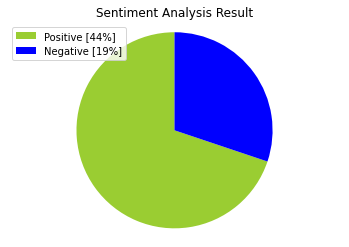

In [27]:
import matplotlib.pyplot as plt

positive = int(100*len(positive_list)/len(tweet_list))
negative = int(100*len(negative_list)/len(tweet_list))

labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, negative]
colors = ['yellowgreen', 'blue']
patches, texts = plt.pie(sizes,colors=colors, startangle=90, radius=50)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

In [15]:
#tokenized
# pd.set_option('display.max_rows', None)
df['Tweets'] = new_sent
dff = pd.DataFrame(df['Tweets'])
dff.head(5)

,Tweets
0,"[uykumda, “ülkemde, tane, bile, mülteci, istem..."
1,"[ülkeyi, mülteci, istilâsından, kurtaracağız]"
2,"[lan, mülteciyse, nasıl, yerleşiyor, amk, ölen..."
3,"[sığınmacı, ile, göçmenmülteci, geçişini, yapt..."
4,"[bize, ne, arkadaşım, arabistan’a, döndü, ülke..."


## Zemberek-NLP

#### Tokenization

In [1]:
#!pip install antlr4-python3-runtime==4.8
#pip install zemberek-python

In [1]:
import time
import logging

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

logger = logging.getLogger(__name__)

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
extractor = TurkishSentenceExtractor()

2022-05-20 15:50:39,088 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 11.963999271392822



#### Sentence Normalization

In [2]:
def normalize_long_text(text):
    normalized_sentences = [normalizer.normalize(word) for word in text]
    normalized_text = " ".join(normalized_sentences)
    return normalized_text

In [ ]:
sentences = df['Tweets'].copy()
new_sent = []
start = time.time()

for token in sentences:   
    if token.count('') > 0:
        token = list(filter(('').__ne__, token))
    new_token = normalize_long_text(token)
    new_sent.append(new_token)

logger.info(f"Sentences normalized in: {time.time() - start} s")

#### Stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sercan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords
import re
stops = set(stopwords.words('turkish'))
print(stops)

{'ama', 'eğer', 'siz', 'da', 'nerde', 'tüm', 'aslında', 'biz', 'çünkü', 'az', 'sanki', 'acaba', 'kim', 'hem', 'birşey', 'ne', 'nereye', 'mu', 'bu', 'nasıl', 've', 'veya', 'niye', 'neden', 'ki', 'için', 'çok', 'defa', 'ise', 'ile', 'biri', 'her', 'en', 'bazı', 'kez', 'diye', 'yani', 'mü', 'hepsi', 'birkaç', 'niçin', 'o', 'belki', 'mı', 'ya', 'şu', 'hep', 'hiç', 'şey', 'nerede', 'de', 'gibi', 'daha'}


In [ ]:
splitted_words = []
for sent in new_sent:
    words = sent.split()
    splitted_words.append(words)

In [29]:
clean_sent = []
for sentence in splitted_words:
    new_sentence = [w for w in sentence if w not in stops]
    clean_sent.append(new_sentence)

#### Lemmatization

In [30]:
for token in clean_sent:
    j = 0
    for word in token:
        new_word = word.replace('"', '').replace("’", '').replace("'", '').replace("”", '')
        token[j] = new_word
        j += 1

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sercan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [ ]:
import zeyrek

analyzer = zeyrek.MorphAnalyzer()
lem_sent = []
for sent in clean_sent:
    normalized_sent = []
    for word in sent:
        if word == '':
            continue
        else:
            lem_word = analyzer.lemmatize(word)
            normalized_sent.append(lem_word[0][1][0])
    lem_sent.append(normalized_sent)

In [ ]:
x = lem_sent.copy()
for sent in x:
    i = 0
    for token in sent:
        sent[i] = token.lower()
        i += 1
lem_sent = x

In [ ]:
lem_sent = list(filter(('').__ne__, lem_sent))

In [ ]:
df['Tweets'] = lem_sent
df['Tweets'].head(5)

In [ ]:
df['Tweets'] = df.Tweets.apply(' '.join)

In [ ]:
df["Tweets"].to_csv("lemmatized_tweets_for_lda.csv")

## Visualizing N-Grams

#### Top Bigrams

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['Tweets'], 30)

In [ ]:
top_bigram = pd.DataFrame(common_words2, columns=['Tweets', "Count"])
top_bigram.head()

In [ ]:
top_bigram.groupby('Tweets').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency")

#### Top Trigrams

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['Tweets'], 30)
top_trigram = pd.DataFrame(common_words3, columns = ['Tweets' , 'Count'])
top_trigram.head(5)

In [ ]:
top_trigram.groupby('Tweets').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency")

## WordCloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

def creat_wordcloud(tweets):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in tweets:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    max_words=3000,
                    stopwords = stopwords,
                    min_font_size = 10,
                    repeat = True).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [ ]:
# All Tweets
creat_wordcloud(df['Tweets'].values)

## Visualizing Top Words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(df['Tweets'], 20)
common_df = pd.DataFrame(common_words, columns = ['Tweets', 'count'])
common_df.head()

In [ ]:
common_df.groupby('Tweets').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency")